# Comparison of Matching Networks

The code below takes the solution data from the HFSS simulations and plots the VSWR, S11, and S21 of each matching network tested in this lab. 

In [39]:
import numpy as np
import skrf as rf
import matplotlib
from matplotlib import pyplot as plt

#Here we import the sNp files that were exported from HFSS

binTxfm = rf.Network('BinomialTransformerHFSS.s2p')
chebTxfm = rf.Network('ChebyTransformerHFSS.s2p')
linTaper = rf.Network('LinTaperHFSS.s2p')
expTaper = rf.Network('ExpTaperHFSS.s2p')


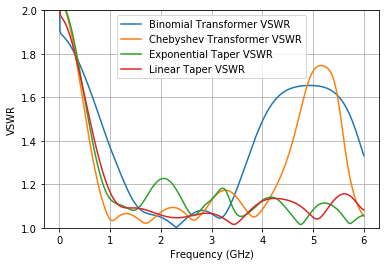

In [62]:
# VSWR is a useful measure for how well a network is matched
# The closer the VSWR is to 1, the better match we have
# VSWR = (1+|S11|)/(1-|S11|) for reciprocal devices
# SKRF has a function that computes the magnitude for us: ntwk.s_mag
# We only care about the S11 values, so we add [:,0,0] after to get only those values (index starts at 0)
# This will make the vswrX variables numpy arrays and not skrf networks, so we have to plot them a bit differently

vswrBin = (1+abs(binTxfm.s_mag[:,0,0]))/(1-abs(binTxfm.s_mag[:,0,0]))
vswrCheb = (1+abs(chebTxfm.s_mag[:,0,0]))/(1-abs(chebTxfm.s_mag[:,0,0]))
vswrExp = (1+abs(expTaper.s_mag[:,0,0]))/(1-abs(expTaper.s_mag[:,0,0]))
vswrLin = (1+abs(linTaper.s_mag[:,0,0]))/(1-abs(linTaper.s_mag[:,0,0]))

# We need frequency as the independent variable to plot the VSWR against
# The data was taken over 0-6 GHz with 601 points, so we'll make that the frequency variable
freq = np.linspace(0,6,601)

# Plotting statements -- check out matplotlib.pyplot documentation for explanation of these
plt.plot(freq,vswrBin,label='Binomial Transformer VSWR') # label='' gives something for the legend to show
plt.plot(freq,vswrCheb,label='Chebyshev Transformer VSWR')
plt.plot(freq,vswrExp,label='Exponential Taper VSWR')
plt.plot(freq,vswrLin,label='Linear Taper VSWR')
plt.ylim(ymax=2) # Any VSWR over 2 is really bad, so we don't care about it
plt.ylim(ymin=1) # The smallest VSWR can get is 1
plt.ylabel('VSWR') # Label the axes to make it look professional
plt.xlabel('Frequency (GHz)')
plt.legend() # Tell us what we're looking at
plt.grid() # Easier to read the graph
plt.show() # Show us the graph


From the VSWR plot, the best match at our design frequency, 2.5 GHz, appears to be the Binomial Transformer, however it does not provide a very wide band match (or at least not as wide as other solutions).

The Chebyshev transformer provides the best low frequency match, but the bandwidth isn't nearly as wide as the tapered solutions. The linear taper achieves a good match over a very wide bandwidth, even better than the exponential taper.

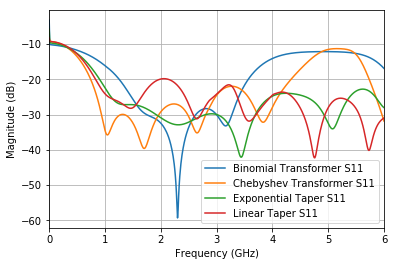

In [59]:
plt.figure()
binTxfm.s11.plot_s_db(label='Binomial Transformer S11')
chebTxfm.s11.plot_s_db(label='Chebyshev Transformer S11')
linTaper.s11.plot_s_db(label='Exponential Taper S11')
expTaper.s11.plot_s_db(label='Linear Taper S11')
plt.grid()
plt.show()

The S11 parameters don't give us any new information from the VSWR plots, but they're here anyways.

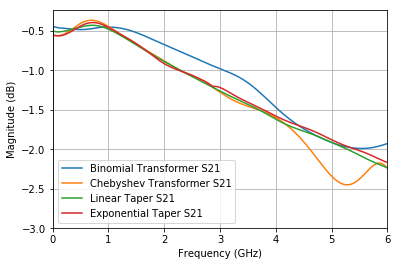

In [60]:
binTxfm.s21.plot_s_db(label='Binomial Transformer S21')
chebTxfm.s21.plot_s_db(label='Chebyshev Transformer S21')
linTaper.s21.plot_s_db(label='Linear Taper S21')
expTaper.s21.plot_s_db(label='Exponential Taper S21')
plt.grid()
plt.show()

The S21 parameters tell us how well the power can get from one end of our network to the other. The binomial transformer provides the best through power transfer over much of the bandwidth. Depending on how wide a band is necessary for this design, the binomial transformer seems like the optimal solution.